<a href="https://colab.research.google.com/github/parhamidi/crack-detection-opencv/blob/parhamidi-testing-1/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow    
import matplotlib.pylab as plt

plt.rcParams['figure.figsize'] = (10,10)

In [ ]:
## A function that uses plot to show original and output image
def plot_result(original,processed):
    plt.subplot(121),plt.imshow(original)
    plt.title('Original'),plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(processed,cmap='gray')
    plt.title("Output"),plt.xticks([]), plt.yticks([])
    plt.show()

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/data/Input-Set/Parking Lot/'
# A list with the data 
data_list = []
for i in range(1, 12):
  data_list.append(cv2.imread(path+'Lot'+str(i)+'.tif', cv2.IMREAD_COLOR))

In [ ]:
# Choosing a sample image (int)
sample_number = 0
sample_im = data_list[sample_number]
sample_labelled = cv2.imread('/content/drive/MyDrive/data/Parham_labelled data/Parking Lot_labelled/Lot1m.png', cv2.IMREAD_GRAYSCALE)

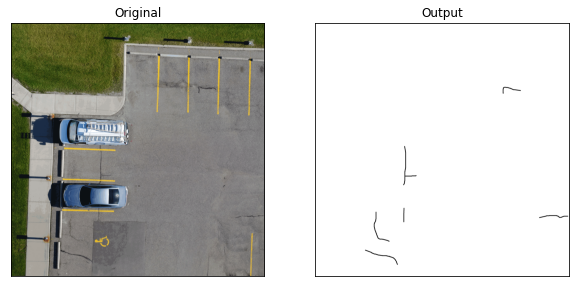

Current image size of original is (3724, 3724, 3) and output is (3724, 3724)


In [ ]:
#Coverting colors from BGR to RGB (to see the right image)
# Can use $sample_im = sample_im[:,:,::-1]$ too
#sample_im = cv2.cvtColor(sample_im, cv2.COLOR_BGR2RGB)

# Comaring the label and the original data
plot_result(sample_im[:,:,::-1],sample_labelled)
print(f"Current image size of original is {sample_im.shape} and output is {sample_labelled.shape}")

In [ ]:
# can use sample_labelled[:,:,np.newaxis] to add new axis
# print(f"Current image size of original is {sample_im.shape} and output is {sample_labelled.shape}")

Current image size of original is (3724, 3724, 3) and output is (3724, 3724, 1, 1, 1)


In [ ]:
# A function to grid/tile the pictyre
def add_grid(img, dx, dy=None):

  im = np.copy(img)
  if dy is None: dy = dx

  grid_color = [300,0,0]

  im[:,::dy,:] = grid_color
  im[::dx,:,:] = grid_color

  plt.imshow(im)
  plt.axis('off')
  plt.show()

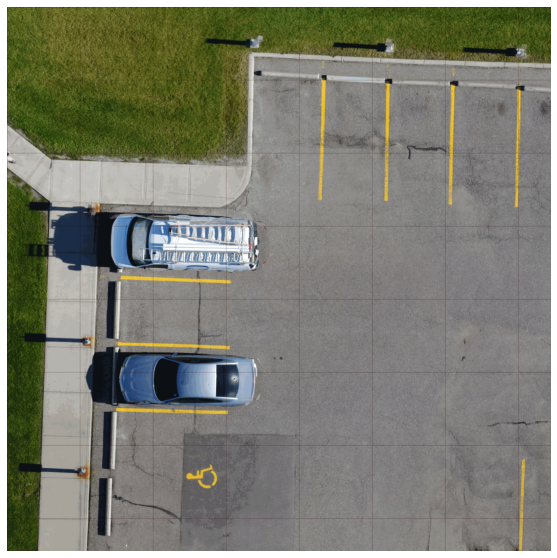

In [ ]:
# Setting squares of size 500 
dx = 500
add_grid(sample_im[:,:,::-1], dx)
#add_grid(sample_labelled[:,:,np.newaxis], dx)

In [ ]:
# Lokking at all data
fig, ax = plt.subplots(3, 4, figsize=(15,15))
for i in range(3):
  for j in range(4):
    if 4*i+j < 11:
      ax[i][j].imshow( lots[4*i+j][:,:,::-1])
    ax[i][j].axis('off')

In [ ]:
# concatenate sample and sample_lablled
p1 = np.concatenate((sample_im[:,:,::-1], sample_labelled[:,:,np.newaxis]), axis=2)
print(p1.dtype)

uint8


In [ ]:
# Now sample_labelled has the same dimension (done while concatenating), and can use p1 from now on (see below for pytorch):
fig, ax = plt.subplots(1, 2, figsize=(15,30))
ax[0].imshow(p1[:,:,:3])
ax[1].imshow(p1[:,:,3], cmap='gray')
fig.show()

In [ ]:
import torch
import torch.nn.functional as F

The shape of the torch sample is torch.Size([1, 4, 3724, 3724]), with the type torch.uint8

 The (new) shape is torch.Size([3, 3724, 3724])


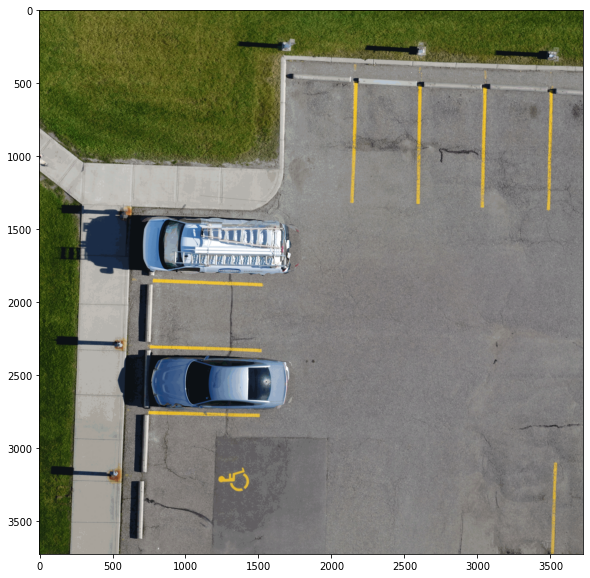

In [ ]:
torch_sample = torch.from_numpy(p1).permute(2,0,1).unsqueeze(0)
print(f"The shape of the torch sample is {torch_sample.shape}, with the type {torch_sample.dtype}")
# To see the old dimensions:
plt.imshow(torch_sample[0,:3,:,:].permute(1,2,0))
print(f"\n The (new) shape is {torch_sample[0,:3,:,:].shape}")

In [ ]:
"""print(torch_sample.shape, '\n',
      torch_sample.stride(), '\n',
      torch_sample.contiguous().stride())"""

torch.Size([1, 4, 3724, 3724]) 
 (4, 1, 14896, 4) 
 (55472704, 13868176, 3724, 1)


In [ ]:
help(torch.Size())

Help on Size object:

class Size(builtins.tuple)
 |  Size(iterable=(), /)
 |  
 |  Built-in immutable sequence.
 |  
 |  If no argument is given, the constructor returns an empty tuple.
 |  If iterable is specified the tuple is initialized from iterable's items.
 |  
 |  If the argument is a tuple, the return value is the same object.
 |  
 |  Method resolution order:
 |      Size
 |      builtins.tuple
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __mul__(self, value, /)
 |      Return self*value.
 |  
 |  __reduce__(...)
 |      Helper for pickle.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  __rmul__(self, value, /)
 |      Return value*self.
 |  
 |  numel(...)
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |  

torch.Size([1, 4, 7, 7, 700, 700])


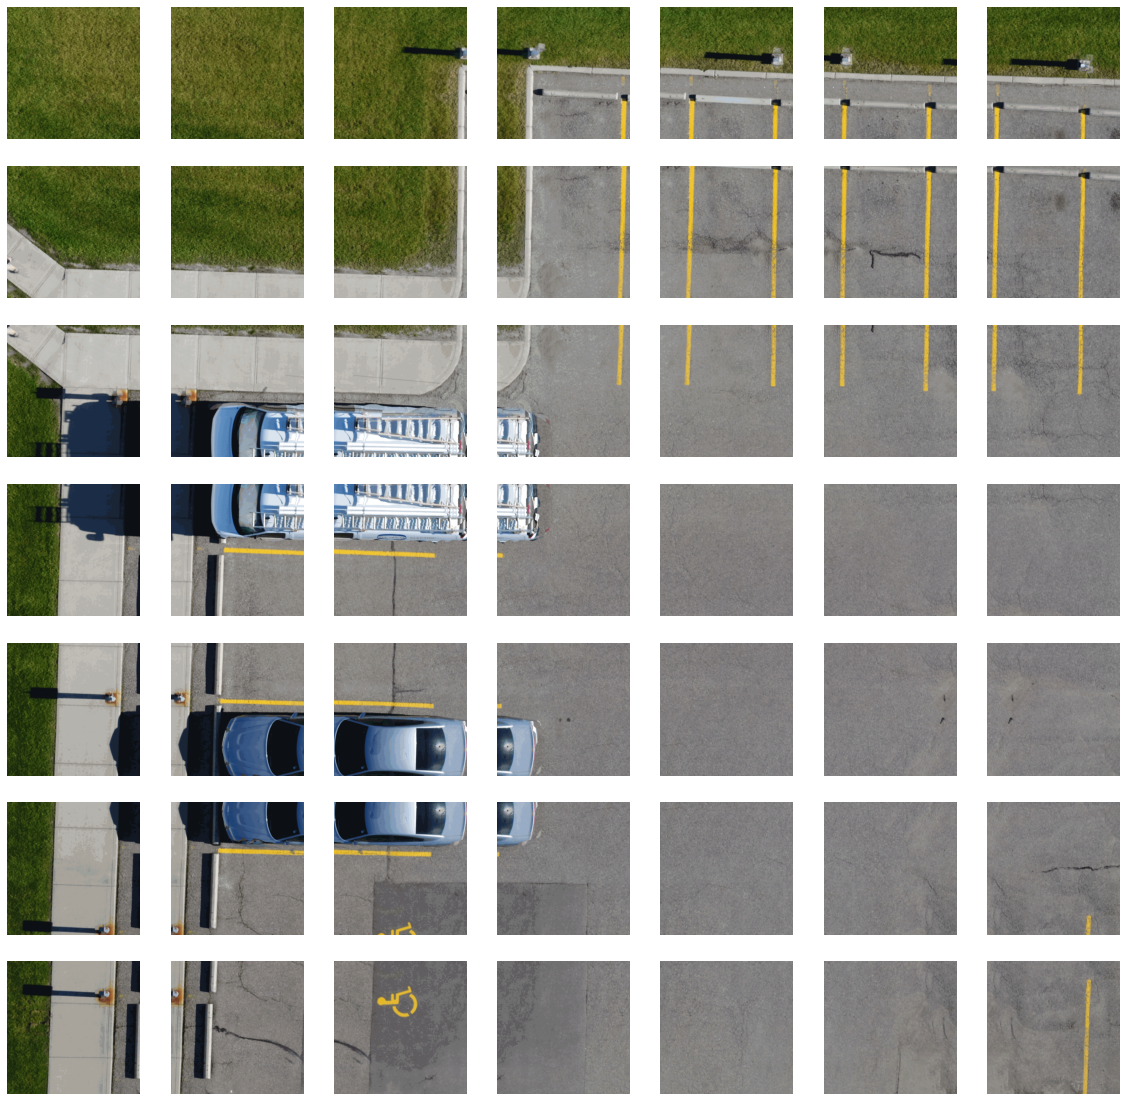

In [ ]:
k = 700
s = 500
p = torch_sample.unfold(2, k, s).unfold(3, k, s)
print(p.size())

n = p.size(2)
fig, ax = plt.subplots(n, n, figsize=(20, 20))
for i in range(n):
  for j in range(n):
    ax[i][j].imshow(p[0,:3, i,j, :,:].permute(1,2,0))
    ax[i][j].axis('off')

22% of patches have cracks


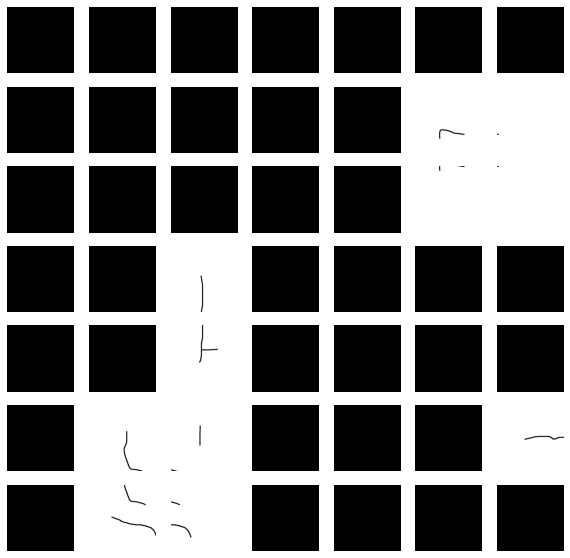

In [ ]:
fig, ax = plt.subplots(n, n, figsize=(10, 10))
c = 0
for i in range(n):
  for j in range(n):
    ax[i][j].imshow(p[0,3, i,j, :,:], cmap='gray')
    ax[i][j].axis('off')
    if p[0,3, i,j, :,:].min() == 255:
      c += 1
# Black square means no crack in this patch
print(f'{100-(c/(n*n)*100):.0f}% of patches have cracks')

In [ ]:
p[0,3, 1,6, :,:].min()

tensor(15, dtype=torch.uint8)

In [ ]:
# This does not work as F.unfold does not support int dtype tensor
# F.unfold(t, kernel_size=(k,k), stride=s)

In [ ]:
# The last file is bigger
for img in data_list:
  print(img.shape)

(3724, 3724, 3)
(3724, 3724, 3)
(3724, 3724, 3)
(3724, 3724, 3)
(3724, 3724, 3)
(3724, 3724, 3)
(3724, 3724, 3)
(3724, 3724, 3)
(3724, 3724, 3)
(3724, 3724, 3)
(5501, 5233, 3)


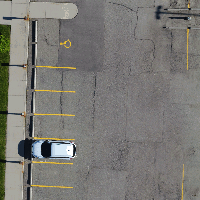

In [ ]:
from PIL import Image
im = Image.open(path+'Lot2.tif').resize((200,200))
im

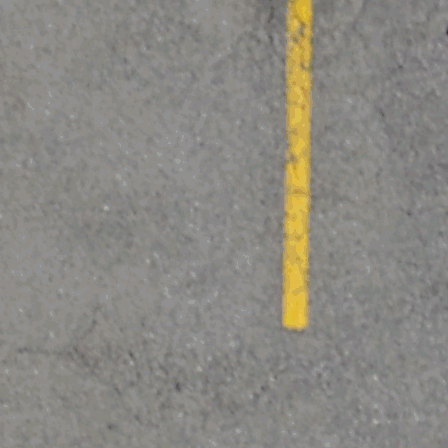

In [ ]:
i, j = 1000, 2300
pixels = 448
cv2_imshow(lots[0][i:i+pixels, j:j+pixels, :])